# PCA - Assignment 8

In [ ]:
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scatter plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

##  Step 1 - Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Data Preprocessing
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Import the dataset

In [3]:
data = pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
print(data.shape)
print(data.columns)

(178, 14)
Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


In [101]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

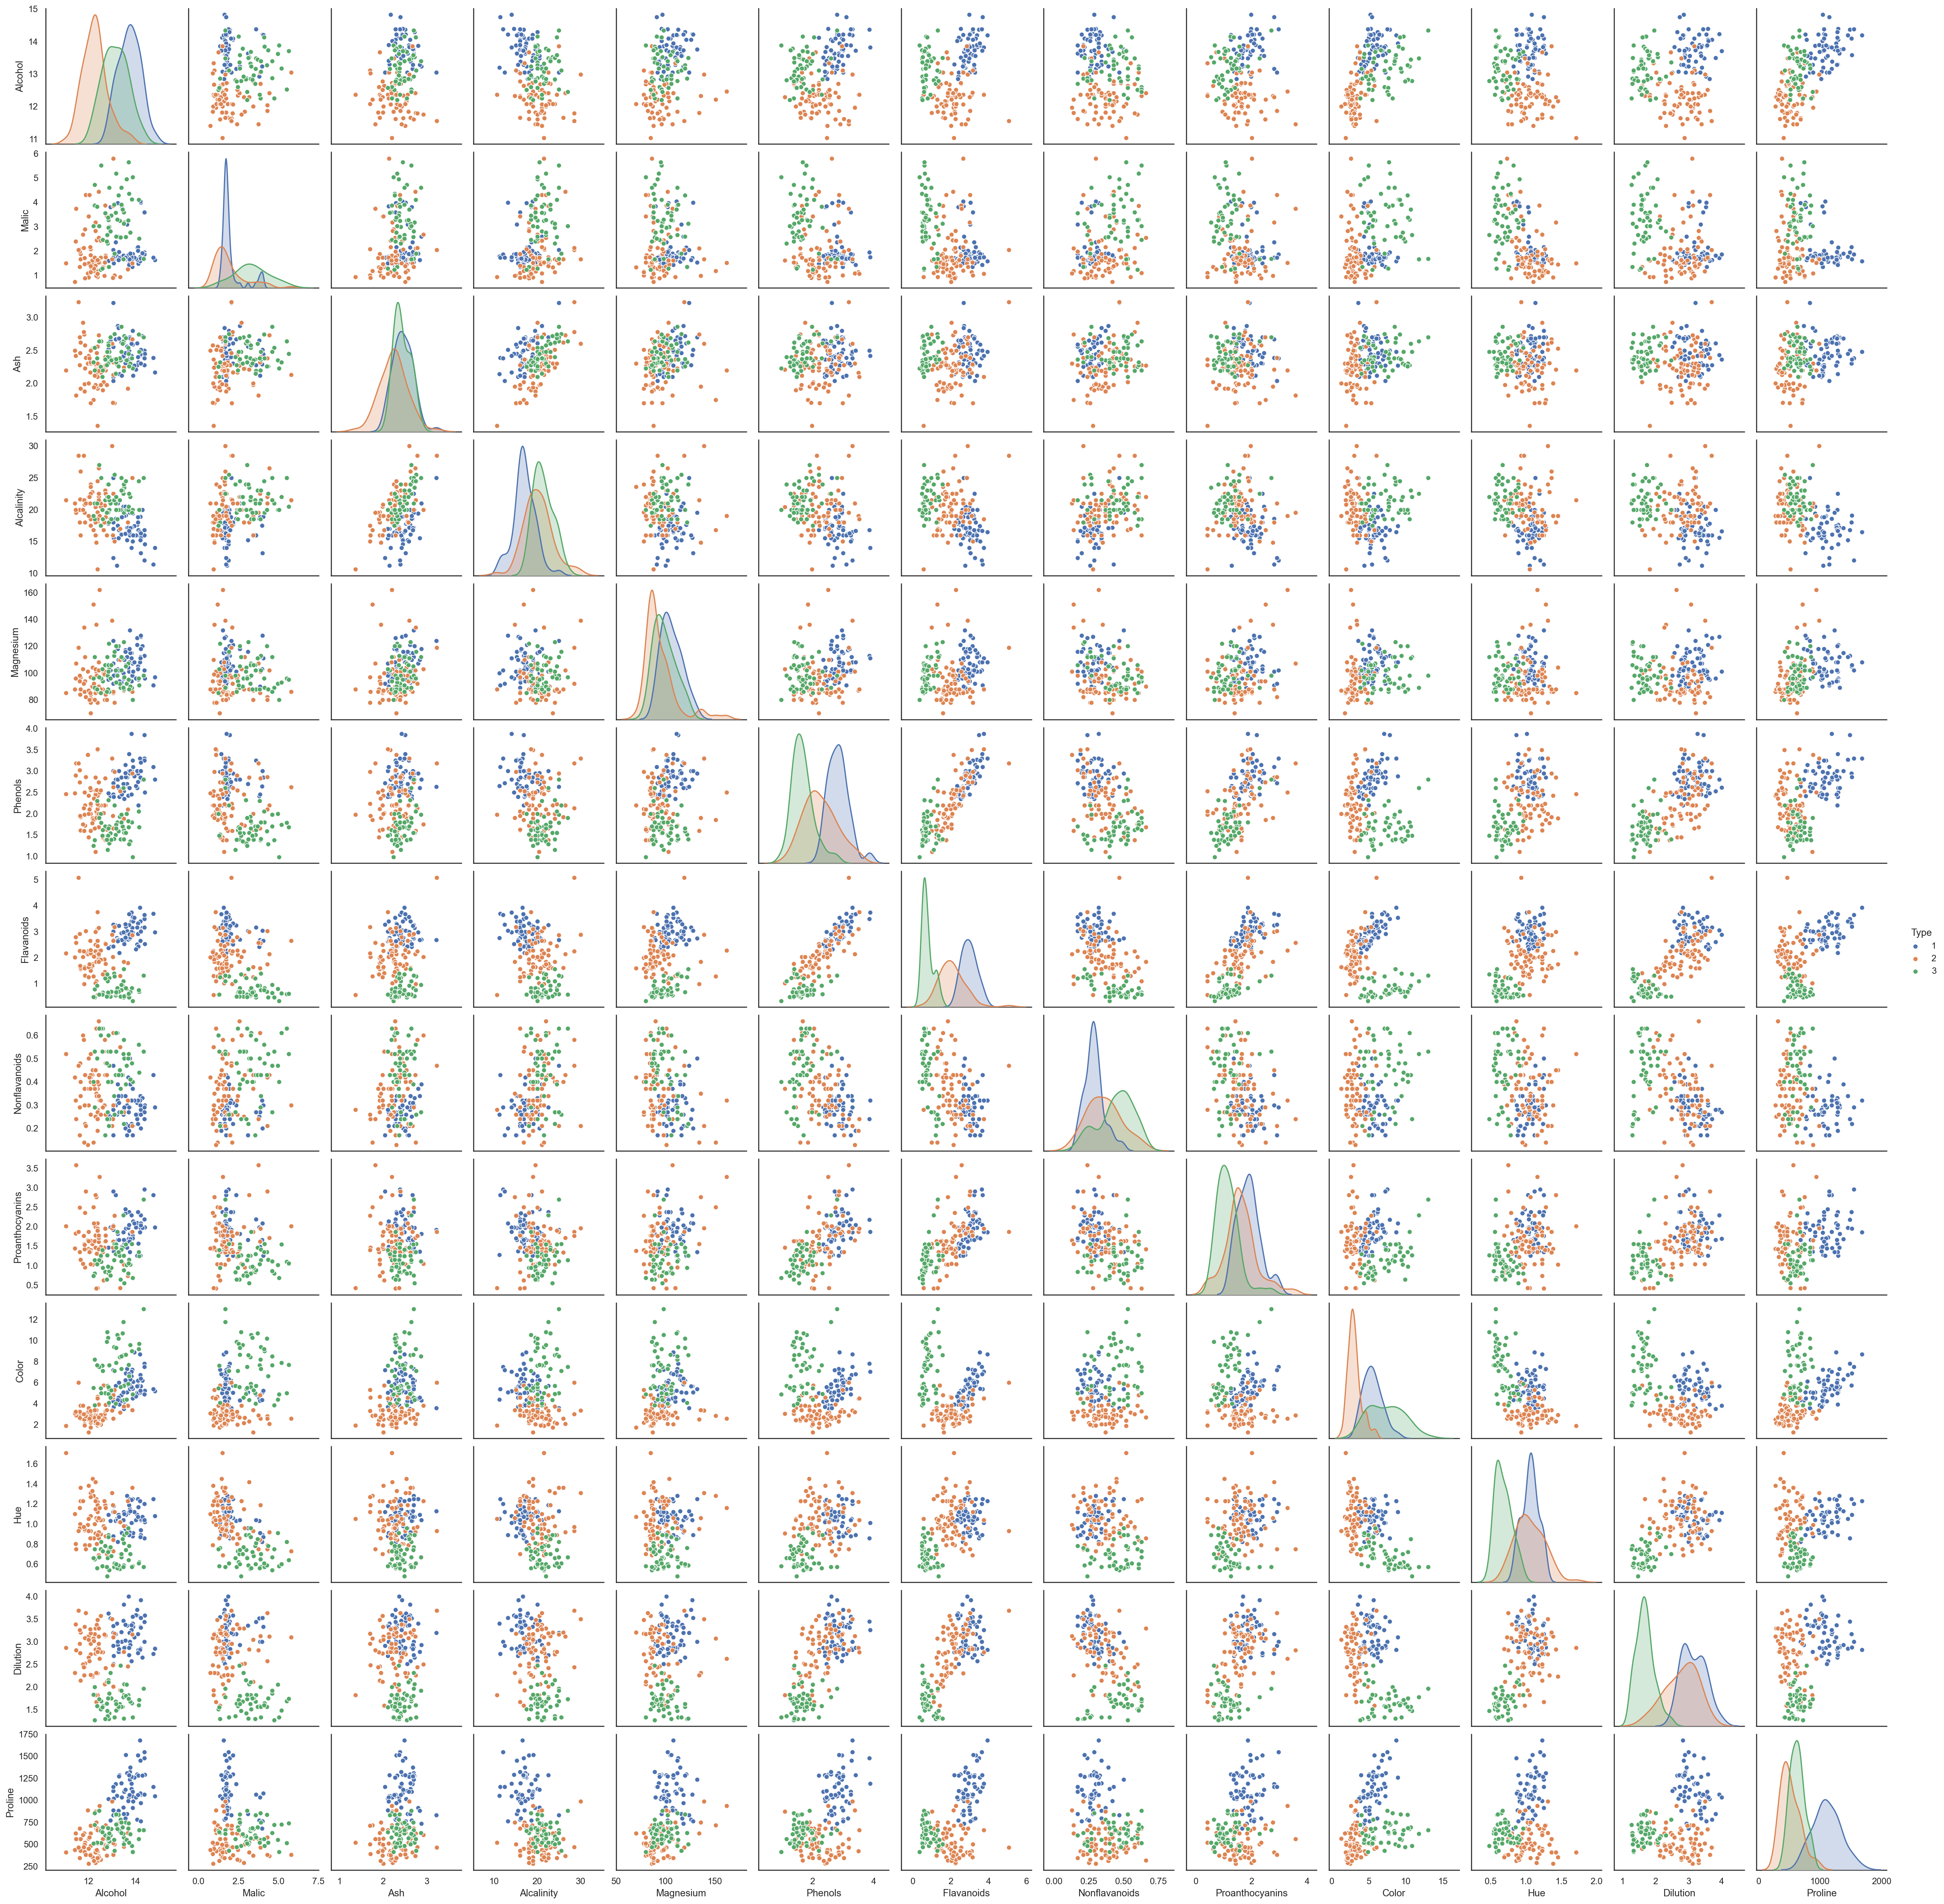

In [38]:
sns.pairplot(data, hue='Type')

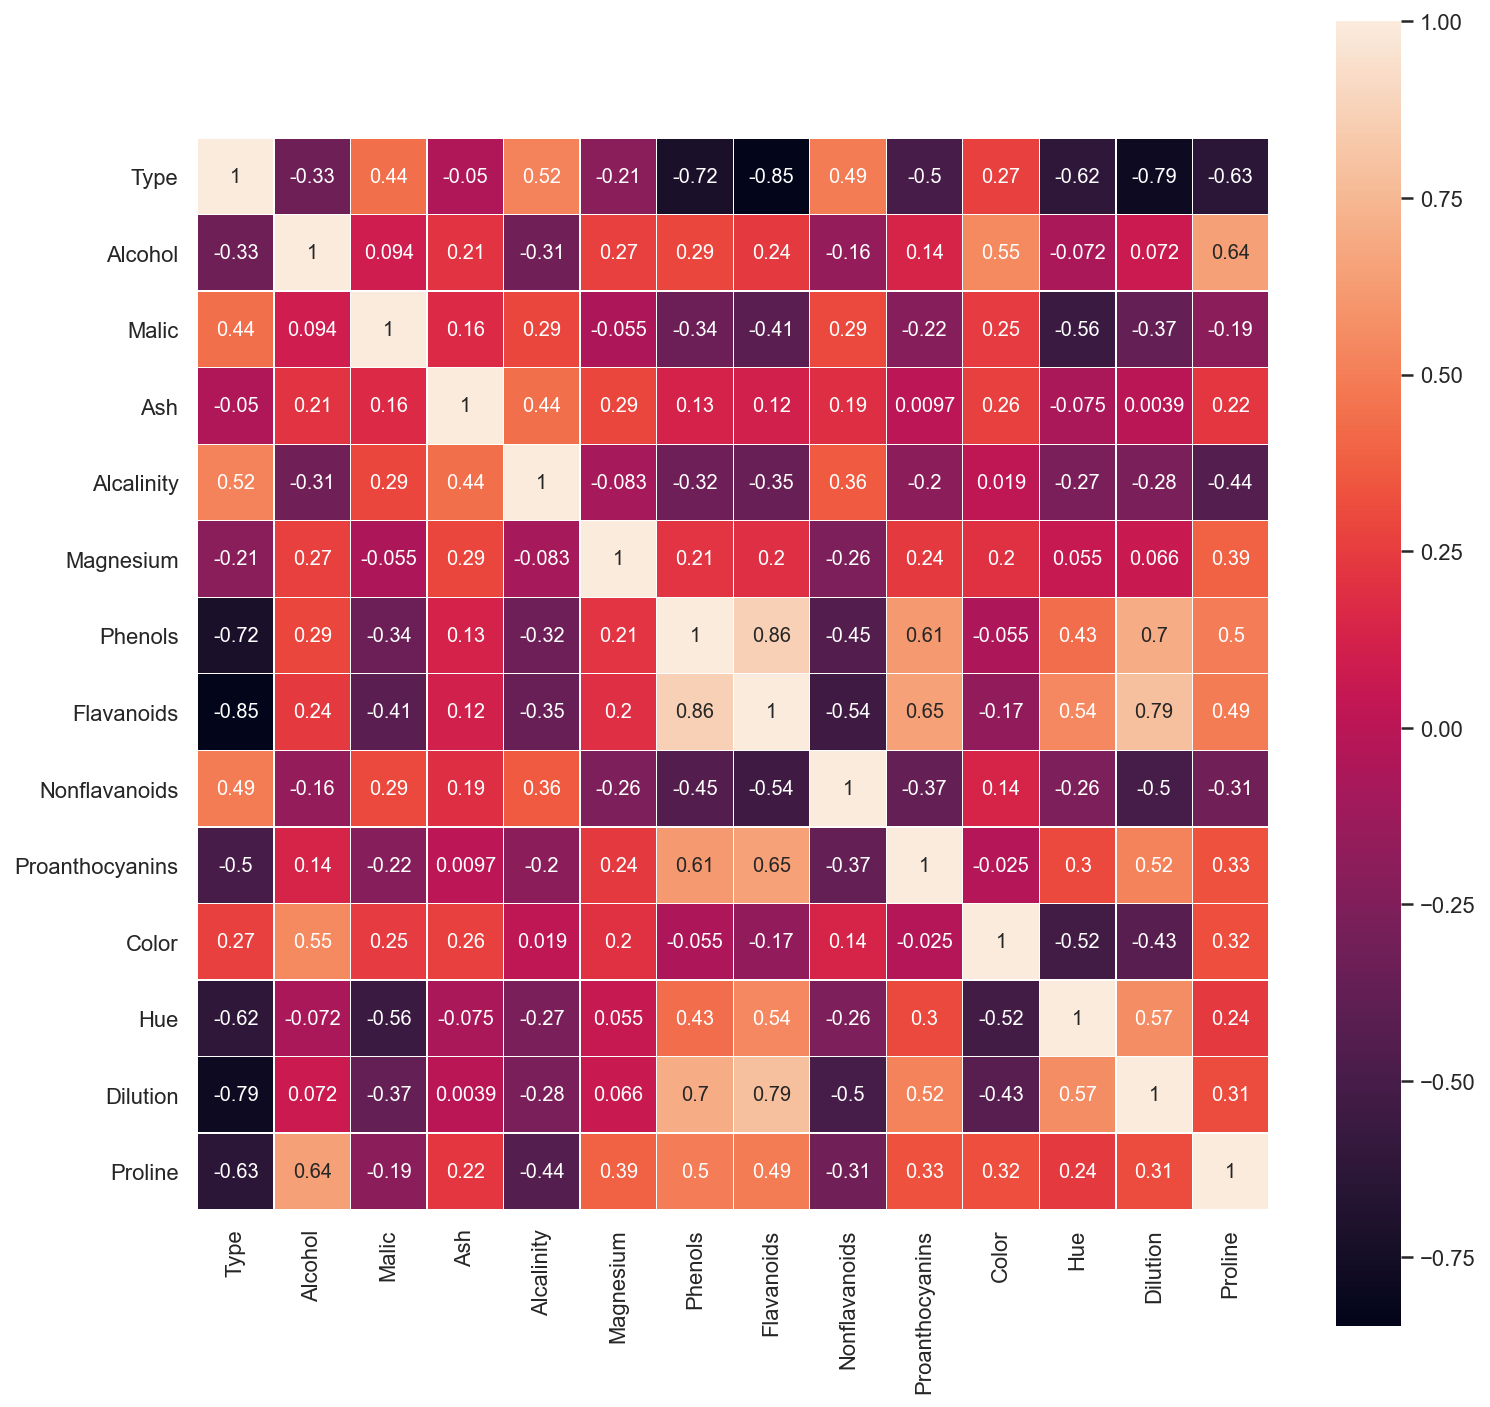

In [108]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(data.astype(float).corr(),linewidth=0.20,square=True,annot=True)

In [5]:
train = data.iloc[:,1:14]
target = data.iloc[:,:1]

## Standardize columns

In [6]:
# Standardize the data
X = train.values
X_std = StandardScaler().fit_transform(X)

## Compute Covariance Matrix

In [8]:
# Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
print(cov_mat)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

## Compute Eigen values and Eigen Vectors

In [10]:
#Calculating Eigenvectors and eigenvalues of cov Matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [11]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [12]:
# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)
print(' ***   Eigen Pairs   *** \n ',eig_pairs)

 ***   Eigen Pairs   *** 
  [(4.732436977583593, array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])), (2.511080929645122, array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
        0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
       -0.27923515, -0.16449619,  0.36490283])), (1.4542418678464688, array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
       -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
       -0.08522192, -0.16600459,  0.12674592])), (0.9241658668248742, array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
        0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
       -0.42777141,  0.18412074, -0.23207086])), (0.8580486765371106, array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
       -0.14931841, -0.1

In [13]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
print('***    Individual explained variance : **** \n',var_exp)
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
print('***    Cumulative explained variance : ****  \n',cum_var_exp)

***    Individual explained variance : **** 
 [36.19884809992635, 19.207490257008924, 11.123630536249998, 7.069030182714033, 6.563293679648598, 4.935823319222561, 4.238679322623328, 2.6807489483788642, 2.222153404789708, 1.9300190939440798, 1.7368356899899147, 1.2982325756042157, 0.7952148898994494]
***    Cumulative explained variance : ****  
 [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


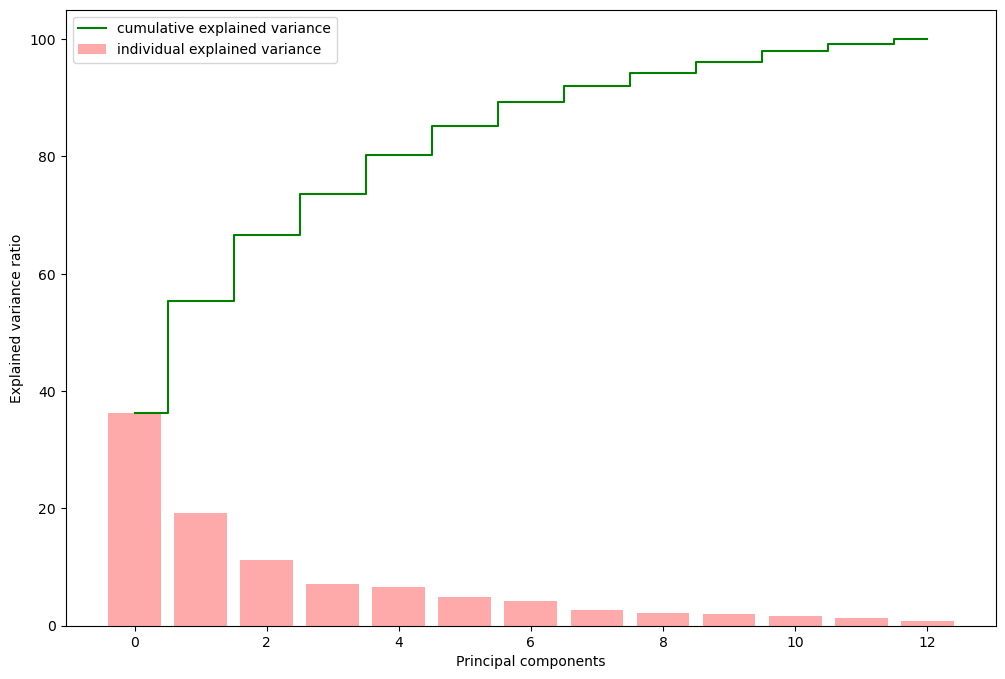

In [32]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(12,8))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'r')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance',color='g')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## PCA model with 3 Components

In [46]:
pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(X_std)
df_pca = pd.DataFrame(pca)

In [22]:
#Relationship of principal components to the original dataset
componen =pd.DataFrame(pcamodel.components_,columns=train.columns)
print(componen)

    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  0.144329 -0.245188 -0.002051   -0.239320   0.141992  0.394661    0.422934   
1 -0.483652 -0.224931 -0.316069    0.010591  -0.299634 -0.065040    0.003360   
2 -0.207383  0.089013  0.626224    0.612080   0.130757  0.146179    0.150682   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.298533         0.313429 -0.088617  0.296715  0.376167  0.286752  
1      -0.028779        -0.039302 -0.529996  0.279235  0.164496 -0.364903  
2       0.170368         0.149454 -0.137306  0.085222  0.166005 -0.126746  


In [30]:
print('***    Individual explained variance : **** \n',pcamodel.explained_variance_ratio_)
print('***    Cumulative explained variance : ****  \n',np.cumsum(pcamodel.explained_variance_ratio_))

***    Individual explained variance : **** 
 [0.36198848 0.1920749  0.11123631]
***    Cumulative explained variance : ****  
 [0.36198848 0.55406338 0.66529969]


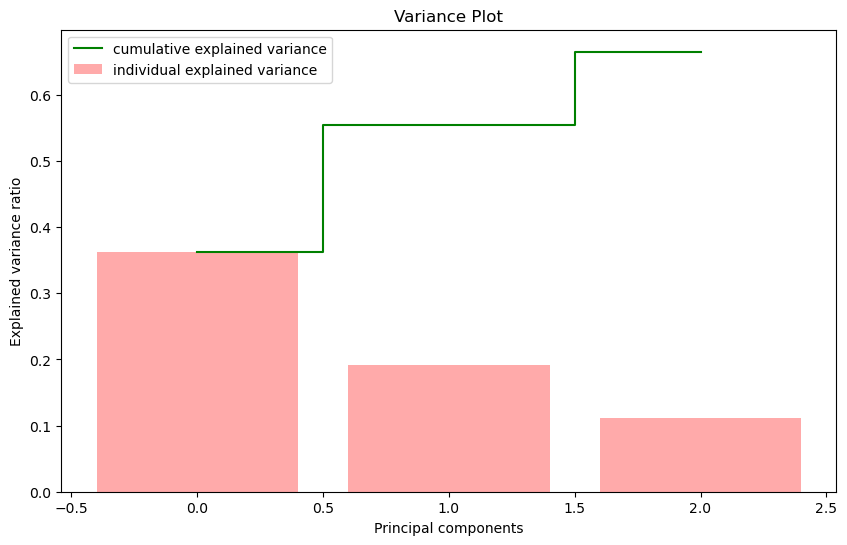

In [65]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10,6))
plt.bar(range(len(pcamodel.explained_variance_ratio_)), pcamodel.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'r')
plt.step(range(len(np.cumsum(pcamodel.explained_variance_ratio_))), np.cumsum(pcamodel.explained_variance_ratio_), where='mid',label='cumulative explained variance',color='g')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Plot')
plt.legend(loc='best')
plt.show()

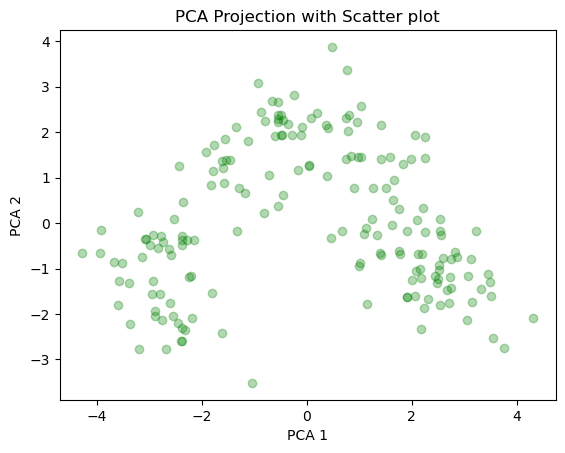

In [64]:
plt.scatter(df_pca[0], df_pca[1], alpha=.3, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection with Scatter plot')
plt.show()

## Clustering 

### Considering the complete dataset

In [ ]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=3) 
model1.fit(X_std)
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
data['clust']=md 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



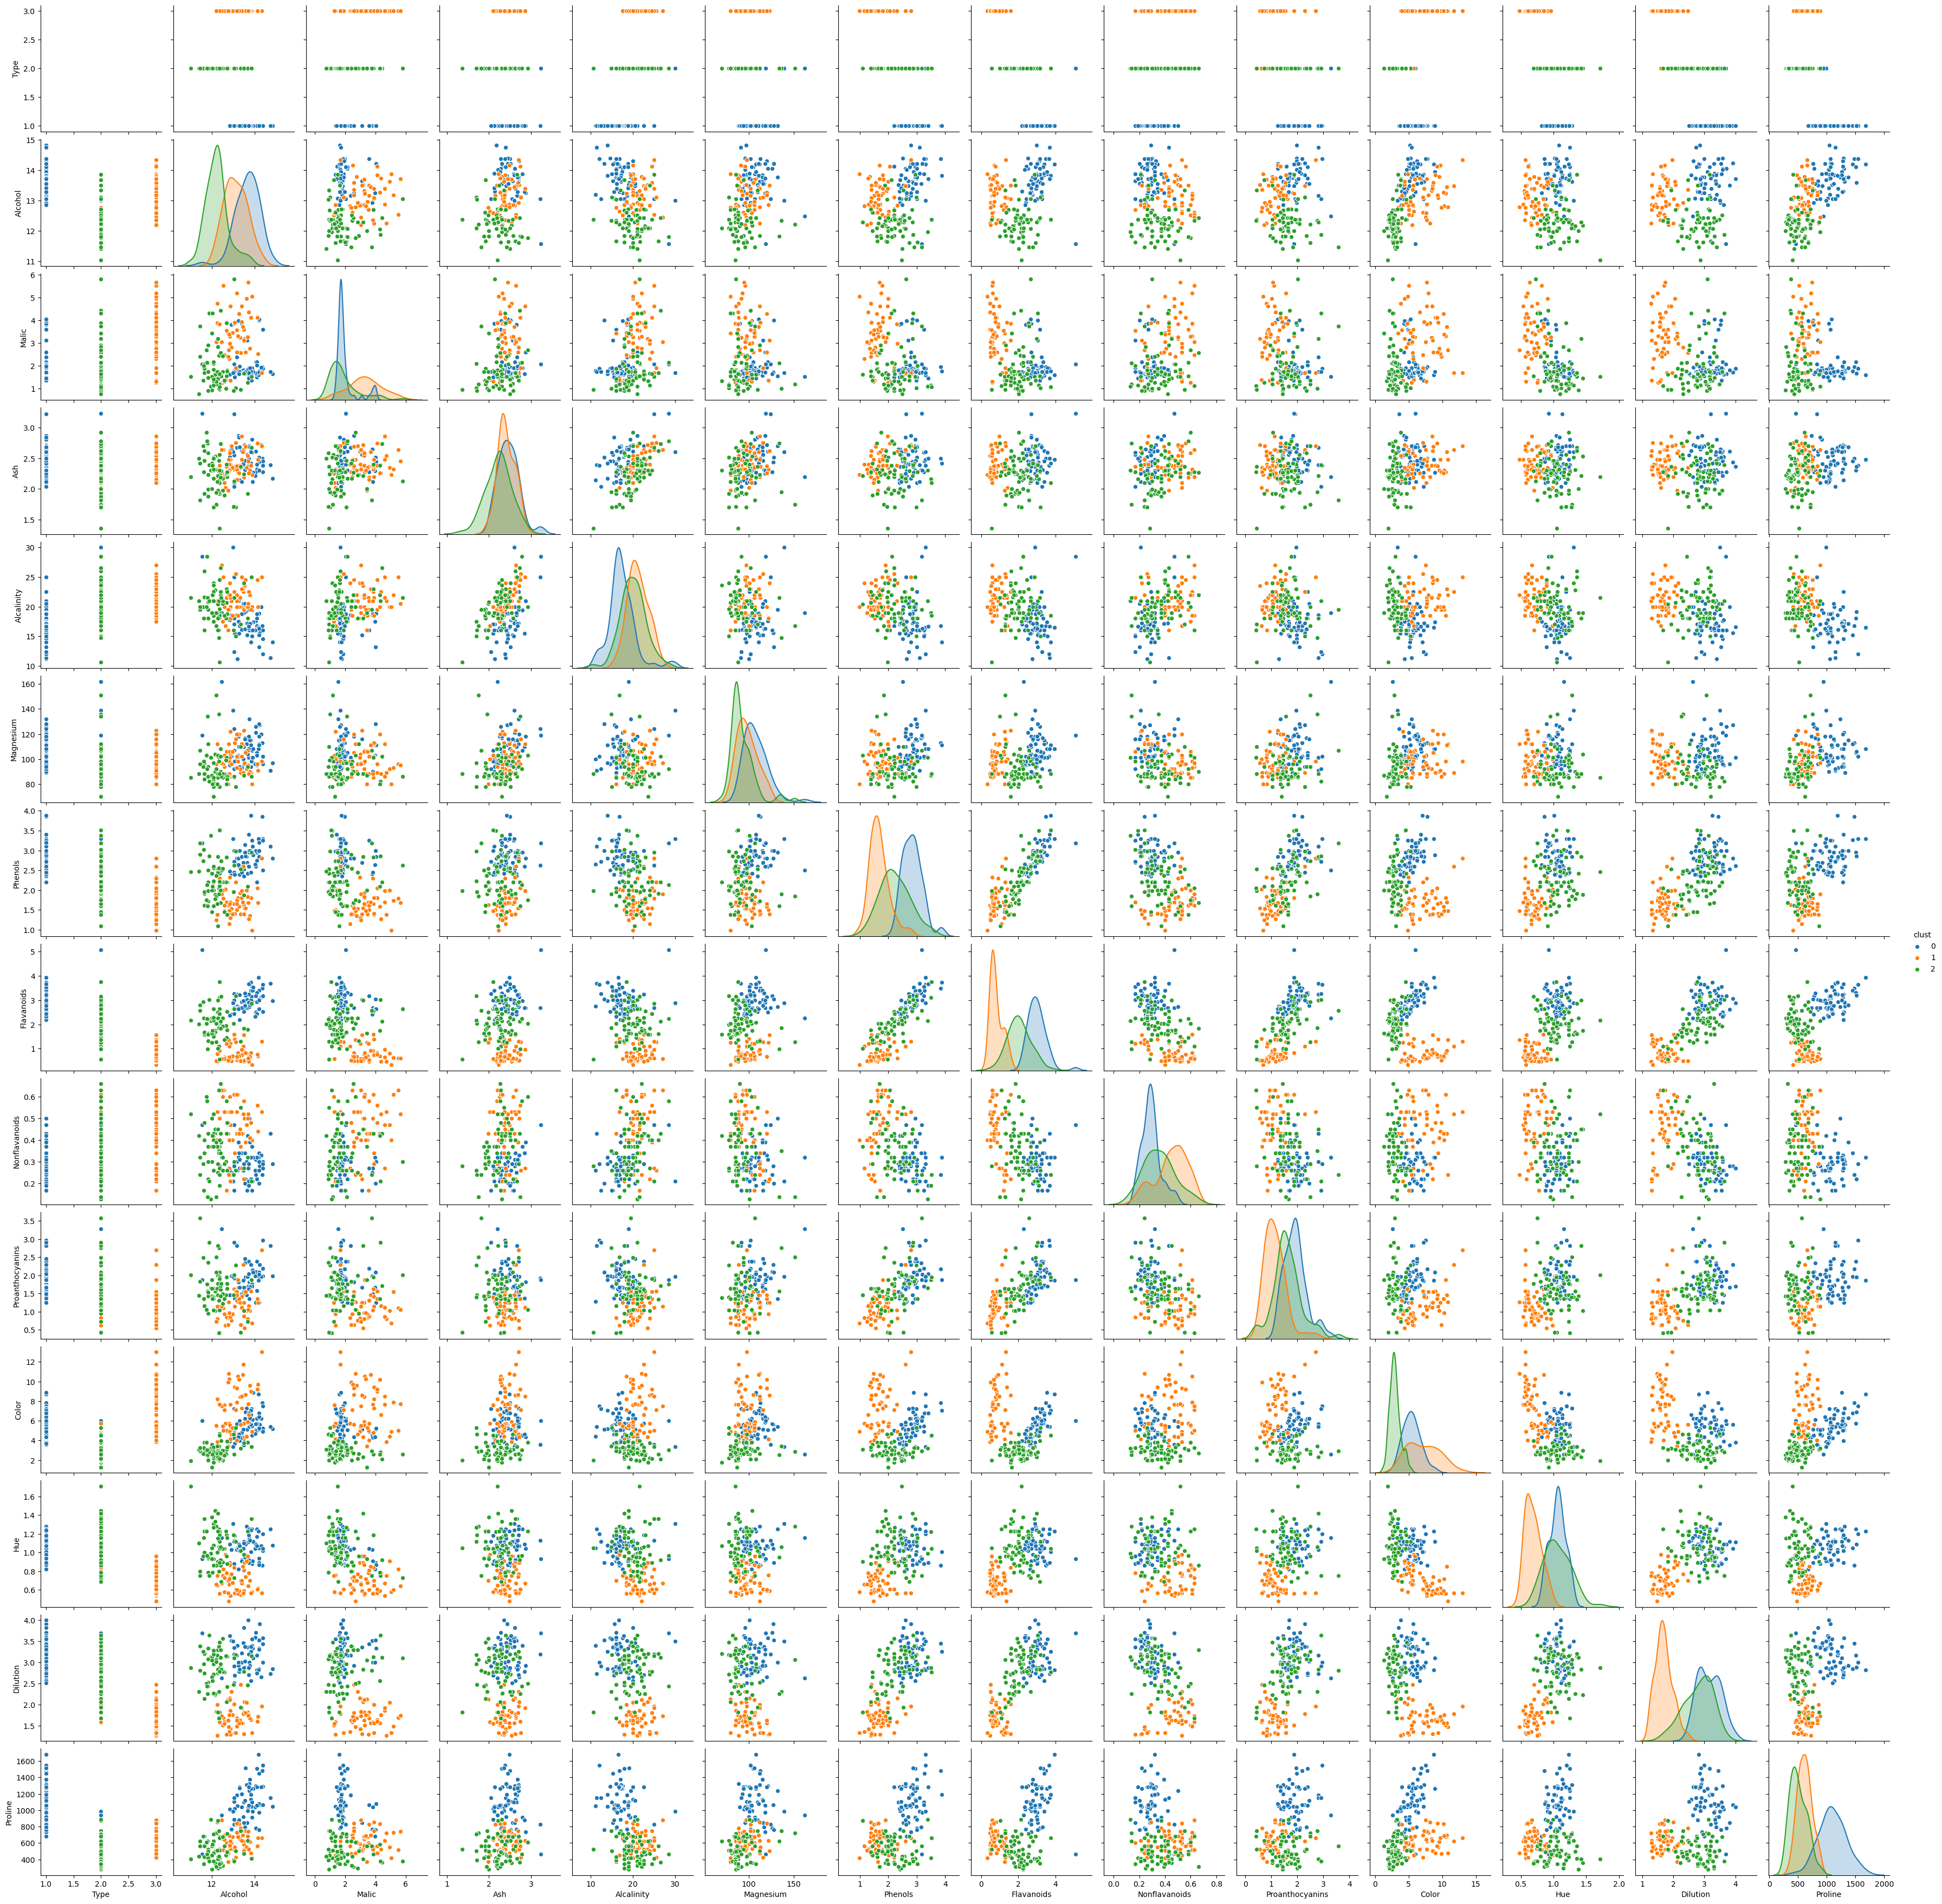

In [34]:
sns.pairplot(data, hue='clust')

### Considering only 3 PC without defining clusters

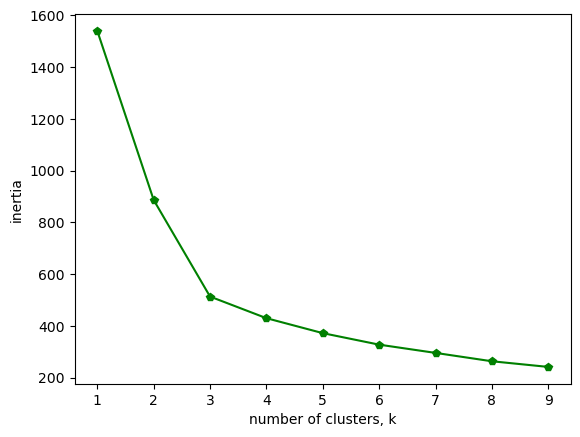

In [60]:
inertias = []
# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model2 = KMeans(n_clusters=k) 
    # Fit model to samples
    model2.fit(df_pca.iloc[:,:3])
    # Append the inertia to the list of inertias
    inertias.append(model2.inertia_)   
plt.plot(range(1,10), inertias, '-p', color='green')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

### Considering 3 PC with 5 clusters

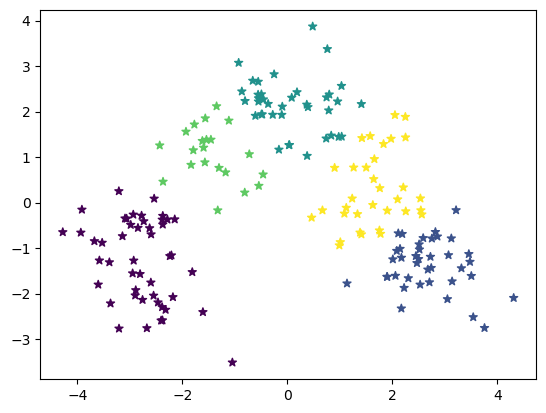

In [63]:
model3 = KMeans(n_clusters=5)
model3.fit(df_pca.iloc[:,:2])

labels = model3.predict(df_pca.iloc[:,:2])
plt.scatter(df_pca[0], df_pca[1], c=labels,marker='*')
plt.show()

In [ ]:
model4 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model4.fit_predict(df_pca.iloc[:,:3])
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model2.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model2.labels_, cmap='cubehelix')
plt.show()